In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_csv('train_bigmarket.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [4]:
train.shape

(8523, 12)

In [5]:
train.drop(['Item_Identifier','Outlet_Identifier','Item_Weight','Outlet_Size'],axis=1,inplace=True)

In [6]:
train.columns=['fat','vis','itype','mrp','yr','loc','otype','sale']
train.head()

,fat,vis,itype,mrp,yr,loc,otype,sale
0,Low Fat,0.016047,Dairy,249.8092,1999,Tier 1,Supermarket Type1,3735.1380
1,Regular,0.019278,Soft Drinks,48.2692,2009,Tier 3,Supermarket Type2,443.4228
2,Low Fat,0.016760,Meat,141.6180,1999,Tier 1,Supermarket Type1,2097.2700
3,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Tier 3,Grocery Store,732.3800
4,Low Fat,0.000000,Household,53.8614,1987,Tier 3,Supermarket Type1,994.7052


In [7]:
train.isnull().sum()

fat      0
vis      0
itype    0
mrp      0
yr       0
loc      0
otype    0
sale     0
dtype: int64

In [8]:
def barstack(a,b):
    sns.scatterplot(train[a],train[b])

In [9]:
train.fat.replace({'low fat':1,'Low Fat':1,'LF':1,'Regular':0,'reg':0},inplace=True)

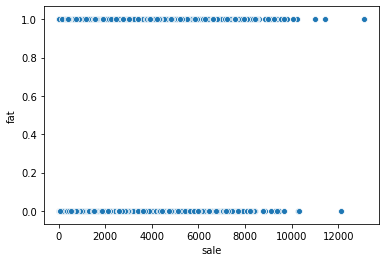

In [10]:
barstack('sale','fat')

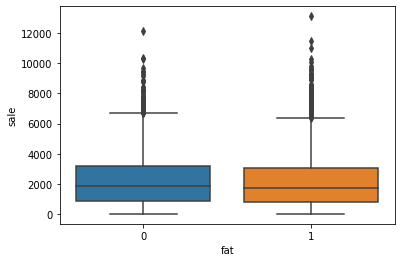

In [11]:
sns.boxplot(y=train['sale'],x=train['fat'])

### fat has lesser correlation with outlet sales

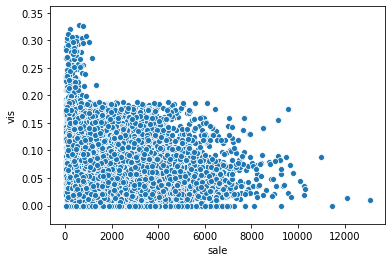

In [12]:
barstack('sale','vis')

low fat ==1
reg==0

vis>=.2 ==1
else 0

### visibility of =1 provides lesser sales

In [13]:
train.loc[train.vis<.2,'vis']=0
train.loc[train.vis>=.2,'vis']=1
train.head()

,fat,vis,itype,mrp,yr,loc,otype,sale
0,1,0.0,Dairy,249.8092,1999,Tier 1,Supermarket Type1,3735.1380
1,0,0.0,Soft Drinks,48.2692,2009,Tier 3,Supermarket Type2,443.4228
2,1,0.0,Meat,141.6180,1999,Tier 1,Supermarket Type1,2097.2700
3,0,0.0,Fruits and Vegetables,182.0950,1998,Tier 3,Grocery Store,732.3800
4,1,0.0,Household,53.8614,1987,Tier 3,Supermarket Type1,994.7052


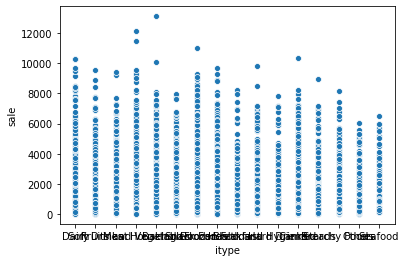

In [14]:
barstack('itype','sale')

### type of item has no contribution to sales

In [15]:
train.drop('itype',axis=1,inplace=True)

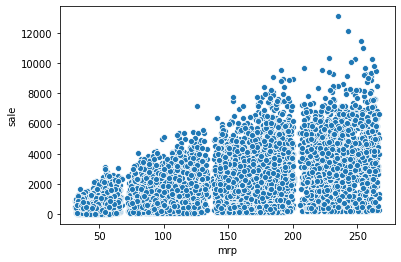

In [16]:
barstack('mrp','sale')

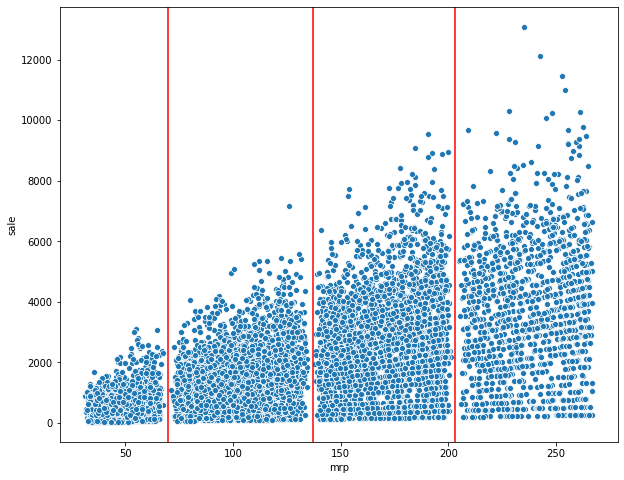

In [17]:
plt.figure(figsize=(10,8))
barstack('mrp','sale')
plt.axvline(70,color='r')
plt.axvline(137,color='r')
plt.axvline(203,color='r')

In [18]:
train.mrp.describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: mrp, dtype: float64

In [19]:
train['mrp_cat']=pd.cut(train.mrp,[0,70,137,203,300],labels=[0,1,2,3])

In [20]:
train.head()

,fat,vis,mrp,yr,loc,otype,sale,mrp_cat
0,1,0.0,249.8092,1999,Tier 1,Supermarket Type1,3735.1380,3
1,0,0.0,48.2692,2009,Tier 3,Supermarket Type2,443.4228,0
2,1,0.0,141.6180,1999,Tier 1,Supermarket Type1,2097.2700,2
3,0,0.0,182.0950,1998,Tier 3,Grocery Store,732.3800,2
4,1,0.0,53.8614,1987,Tier 3,Supermarket Type1,994.7052,0


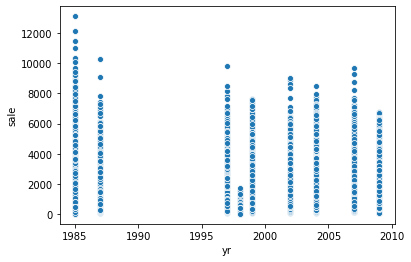

In [21]:
barstack('yr','sale')

In [22]:
train['yr_cat']=pd.cut(train.yr,[0,1997.5,1998.5,2020],labels=[-1,0,1])
train.head()

,fat,vis,mrp,yr,loc,otype,sale,mrp_cat,yr_cat
0,1,0.0,249.8092,1999,Tier 1,Supermarket Type1,3735.1380,3,1
1,0,0.0,48.2692,2009,Tier 3,Supermarket Type2,443.4228,0,1
2,1,0.0,141.6180,1999,Tier 1,Supermarket Type1,2097.2700,2,1
3,0,0.0,182.0950,1998,Tier 3,Grocery Store,732.3800,2,0
4,1,0.0,53.8614,1987,Tier 3,Supermarket Type1,994.7052,0,-1


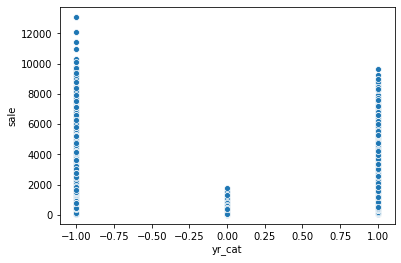

In [23]:
barstack('yr_cat','sale')

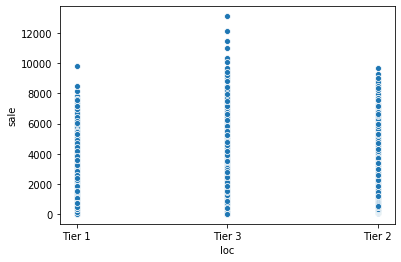

In [24]:
barstack('loc','sale')

In [25]:
train['loc'].replace({'Tier 1':1,'Tier 2':2,'Tier 3':3},inplace=True)

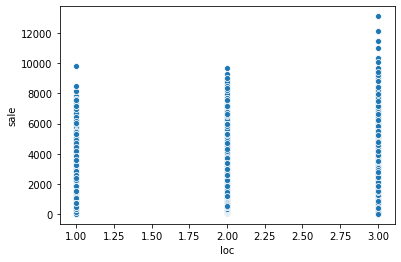

In [26]:
barstack('loc','sale')

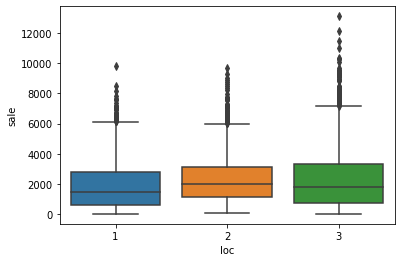

In [27]:
sns.boxplot(x=train['loc'],y=train.sale)

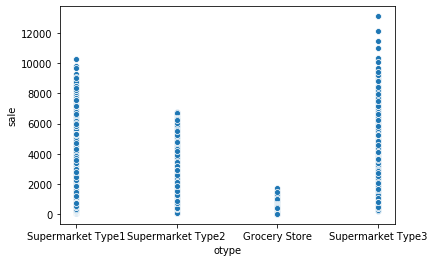

In [28]:
barstack('otype','sale')

In [29]:
train['otype'].replace({'Supermarket Type1':2,'Supermarket Type2':1,'Supermarket Type3':3,'Grocery Store':0},inplace=True)

In [30]:
train.head()

,fat,vis,mrp,yr,loc,otype,sale,mrp_cat,yr_cat
0,1,0.0,249.8092,1999,1,2,3735.1380,3,1
1,0,0.0,48.2692,2009,3,1,443.4228,0,1
2,1,0.0,141.6180,1999,1,2,2097.2700,2,1
3,0,0.0,182.0950,1998,3,0,732.3800,2,0
4,1,0.0,53.8614,1987,3,2,994.7052,0,-1


In [31]:
train.dtypes

fat           int64
vis         float64
mrp         float64
yr            int64
loc           int64
otype         int64
sale        float64
mrp_cat    category
yr_cat     category
dtype: object

In [32]:
train.mrp_cat=train.mrp_cat.astype('int')
train.yr_cat=train.yr_cat.astype('int')

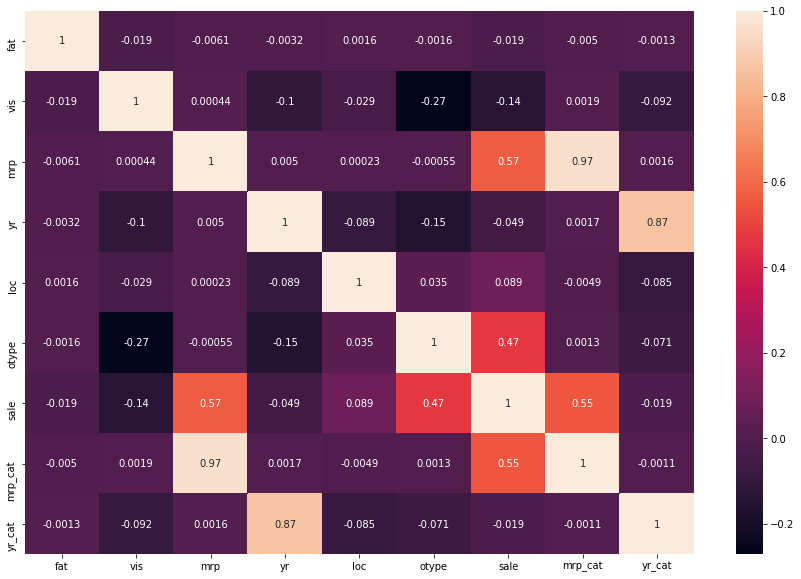

In [33]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(),annot=True)

## visualizing correlation

In [34]:
train.head()

,fat,vis,mrp,yr,loc,otype,sale,mrp_cat,yr_cat
0,1,0.0,249.8092,1999,1,2,3735.1380,3,1
1,0,0.0,48.2692,2009,3,1,443.4228,0,1
2,1,0.0,141.6180,1999,1,2,2097.2700,2,1
3,0,0.0,182.0950,1998,3,0,732.3800,2,0
4,1,0.0,53.8614,1987,3,2,994.7052,0,-1


In [35]:
train.drop(['mrp_cat','yr_cat'],axis=1,inplace=True)

### droping categories as reduction in correlation on dividing in categories

In [36]:
x=pd.get_dummies(columns=['fat','vis','yr','loc','otype'],data=train.drop('sale',axis=1))
x.drop(['fat_1','vis_1.0'],axis=1,inplace=True)
y=train.sale
x.head()

,mrp,fat_0,vis_0.0,yr_1985,yr_1987,yr_1997,yr_1998,yr_1999,yr_2002,yr_2004,yr_2007,yr_2009,loc_1,loc_2,loc_3,otype_0,otype_1,otype_2,otype_3
0,249.8092,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,48.2692,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
2,141.6180,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,182.0950,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
4,53.8614,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf=KFold(n_splits=10,random_state=1,shuffle=True)

In [38]:
score=cross_val_score(LinearRegression(),x,y,cv=kf).mean()
score

0.5625856782900788

In [39]:
list=[5,10,50,100,500]
for i in list:
    score=cross_val_score(DecisionTreeRegressor(max_leaf_nodes=i),x,y,cv=kf).mean()
    print('....',i)
    print(score)

.... 5
0.485979473185704
.... 10
0.5804423198335177
.... 50
0.5715437450209819
.... 100
0.5526994928952622
.... 500
0.4315627551472585


In [40]:
list=[15,20,25,40]
for i in list:
    score=cross_val_score(DecisionTreeRegressor(max_leaf_nodes=i),x,y,cv=kf).mean()
    print('....',i)
    print(score)

.... 15
0.5905856828739215
.... 20
0.5893773233051923
.... 25
0.5868522097849135
.... 40
0.5785562897971213


In [41]:
list=[14,15,16,17,18,19]
for i in list:
    score=cross_val_score(DecisionTreeRegressor(max_leaf_nodes=i),x,y,cv=kf).mean()
    print('....',i)
    print(score)

.... 14
0.5890750911100634
.... 15
0.5905856828739215
.... 16
0.5917590059503788
.... 17
0.5929422534737466
.... 18
0.5924077254294458
.... 19
0.5912727030353645


In [42]:
score=cross_val_score(DecisionTreeRegressor(max_leaf_nodes=18),x,y,cv=kf).mean()
score

0.5924077254294458

In [43]:
list=[5,10,50,100,500]
for i in list:
    score=cross_val_score(RandomForestRegressor(max_leaf_nodes=i),x,y,cv=kf).mean()
    print('....',i)
    print(score)

.... 5
0.5210075095085143
.... 10
0.591093386674264
.... 50
0.5946510198672041
.... 100
0.5875063359037233
.... 500
0.5458258192503243


In [44]:
list=[20,30,40,60,70,80]
for i in list:
    score=cross_val_score(RandomForestRegressor(max_leaf_nodes=i),x,y,cv=kf).mean()
    print('....',i)
    print(score)

.... 20
0.598014046959672
.... 30
0.5977729669916225
.... 40
0.5965154802686045
.... 60
0.5942953728063117
.... 70
0.5921303666268595
.... 80
0.5911005315621095


In [45]:
list=[16,17,18,19,21,22]
for i in list:
    score=cross_val_score(RandomForestRegressor(max_leaf_nodes=i),x,y,cv=kf).mean()
    print('....',i)
    print(score)

.... 16
0.5977212954847365
.... 17
0.5979601997476799
.... 18
0.5982491475282931
.... 19
0.5985546055074836
.... 21
0.5981506671969148
.... 22
0.5982701398488997


In [46]:
score=cross_val_score(RandomForestRegressor(max_leaf_nodes=22),x,y,cv=kf).mean()
score

0.5983337364310535

In [47]:
list=[5,10,15,20]
for i in list:
    score=cross_val_score(RandomForestRegressor(max_depth=i),x,y,cv=kf).mean()
    print('....',i)
    print(score)

.... 5
0.5993066807134976
.... 10
0.5841463028087601
.... 15
0.540118308994354
.... 20
0.5046912781908688


In [48]:
list=[4,6]
for i in list:
    score=cross_val_score(RandomForestRegressor(max_depth=i),x,y,cv=kf).mean()
    print('....',i)
    print(score)

.... 4
0.5893252703272459
.... 6
0.5995672535880702


In [49]:
score=cross_val_score(RandomForestRegressor(max_depth=5),x,y,cv=kf).mean()
score

0.5998650348555443

In [50]:
score=cross_val_score(RandomForestRegressor(max_leaf_nodes=22,max_depth=5),x,y,cv=kf).mean()
score

0.5992472675912472

In [51]:
rg=RandomForestRegressor(max_leaf_nodes=22,max_depth=5)
rg.fit(x,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=22,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [52]:
test=pd.read_csv('test_bigmarket.csv')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [53]:
test.drop(['Item_Identifier','Item_Weight','Outlet_Identifier','Outlet_Size'],axis=1,inplace=True)
test.columns=['fat','vis','itype','mrp','yr','loc','otype']
test.fat.replace({'low fat':1,'Low Fat':1,'LF':1,'Regular':0,'reg':0},inplace=True)
test.loc[test.vis<.2,'vis']=0
test.loc[test.vis>=.2,'vis']=1
test['loc'].replace({'Tier 1':1,'Tier 2':2,'Tier 3':3},inplace=True)
test['otype'].replace({'Supermarket Type1':2,'Supermarket Type2':1,'Supermarket Type3':3,'Grocery Store':0},inplace=True)
test.drop('itype',axis=1,inplace=True)

In [54]:
test=pd.get_dummies(columns=['fat','vis','yr','loc','otype'],data=test)
test.drop(['fat_1','vis_1.0'],axis=1,inplace=True)
test.head()

,mrp,fat_0,vis_0.0,yr_1985,yr_1987,yr_1997,yr_1998,yr_1999,yr_2002,yr_2004,yr_2007,yr_2009,loc_1,loc_2,loc_3,otype_0,otype_1,otype_2,otype_3
0,107.8622,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,87.3198,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
2,241.7538,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
3,155.0340,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,234.2300,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [55]:
test['sale']=rg.predict(test)
test.head()

,mrp,fat_0,vis_0.0,yr_1985,yr_1987,yr_1997,yr_1998,yr_1999,yr_2002,yr_2004,yr_2007,yr_2009,loc_1,loc_2,loc_3,otype_0,otype_1,otype_2,otype_3,sale
0,107.8622,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1599.444802
1,87.3198,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1424.931269
2,241.7538,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,564.325949
3,155.0340,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,2496.437873
4,234.2300,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,6160.192344


In [56]:
submit=pd.read_csv('sample_submission_bigmarket.csv')
submit.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [57]:
submit.Item_Outlet_Sales=test.sale
submit.to_csv('randforest_1.csv',index=False)